# Student Performance Analysis

This notebook explores a dataset of student scores to analyze performance, identify key factors influencing scores, and build a predictive model.

Dataset from: https://www.kaggle.com/datasets/markmedhat/student-scores

## Data Loading and Initial Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student-scores.csv')
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
print("Shape of Dataframe", df.shape)
df.columns

Shape of Dataframe (2000, 18)


Index(['id', 'email', 'gender', 'part_time_job', 'absence_days',
       'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'Total_score', 'Percentage', 'Full_name'],
      dtype='object')

In [ ]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [ ]:
df.isnull().sum()

,0
id,0
first_name,0
last_name,0
email,0
gender,0
part_time_job,0
absence_days,0
extracurricular_activities,0
weekly_self_study_hours,0
career_aspiration,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

id 2000
first_name 453
last_name 707
email 2000
gender 2
part_time_job 2
absence_days 11
extracurricular_activities 2
weekly_self_study_hours 50
career_aspiration 17
math_score 61
history_score 51
physics_score 50
chemistry_score 51
biology_score 68
english_score 50
geography_score 41


## Data Cleaning and Preparation

Performing initial data cleaning, handling missing values, and creating new relevant features.

In [ ]:
df['Total_score'] = df['math_score'] + df['history_score'] + df['physics_score'] + df['chemistry_score'] + df['biology_score'] + df['english_score']+ df['geography_score']
df['Percentage'] = df['Total_score'].astype(int)/7
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Total_score,Percentage
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


In [ ]:
df['Full_name'] = df['first_name'] + ' ' + df['last_name']
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Total_score,Percentage,Full_name
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000,Paul Casey
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571,Danielle Sandoval
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571,Tina Andrews
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286,Tara Clark
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571,Anthony Campos


In [ ]:
df.drop(['first_name', 'last_name'], axis=1, inplace=True)
df.reset_index()

df.head(5)

,id,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,Total_score,Percentage,Full_name
0,1,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000,Paul Casey
1,2,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571,Danielle Sandoval
2,3,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571,Tina Andrews
3,4,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286,Tara Clark
4,5,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571,Anthony Campos


##Understanding Distribution

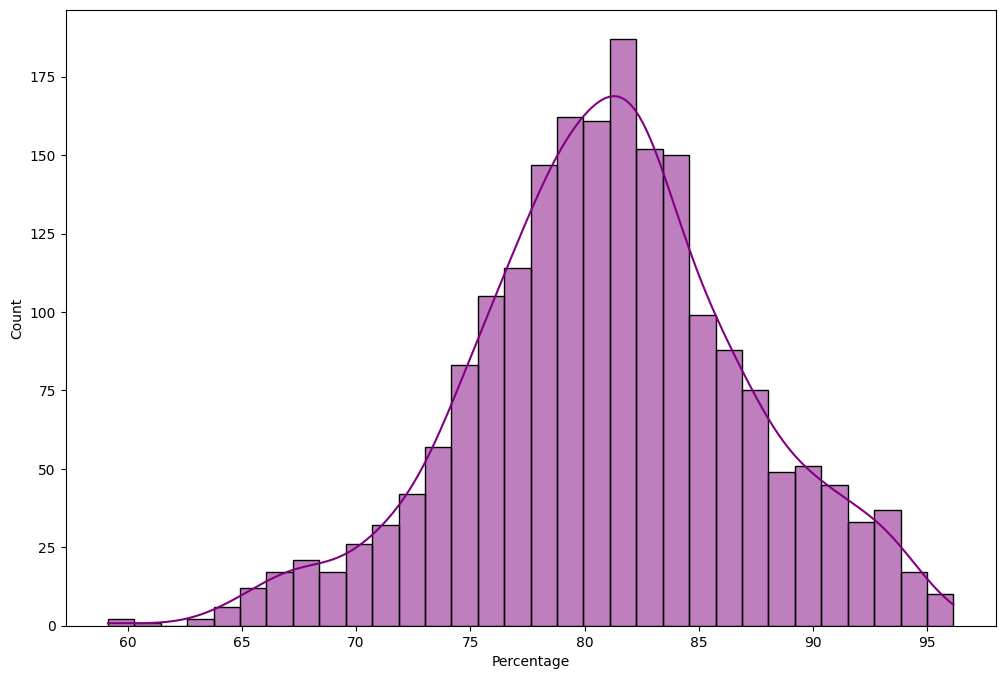

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['Percentage'], kde= True, color='purple')
plt.show()

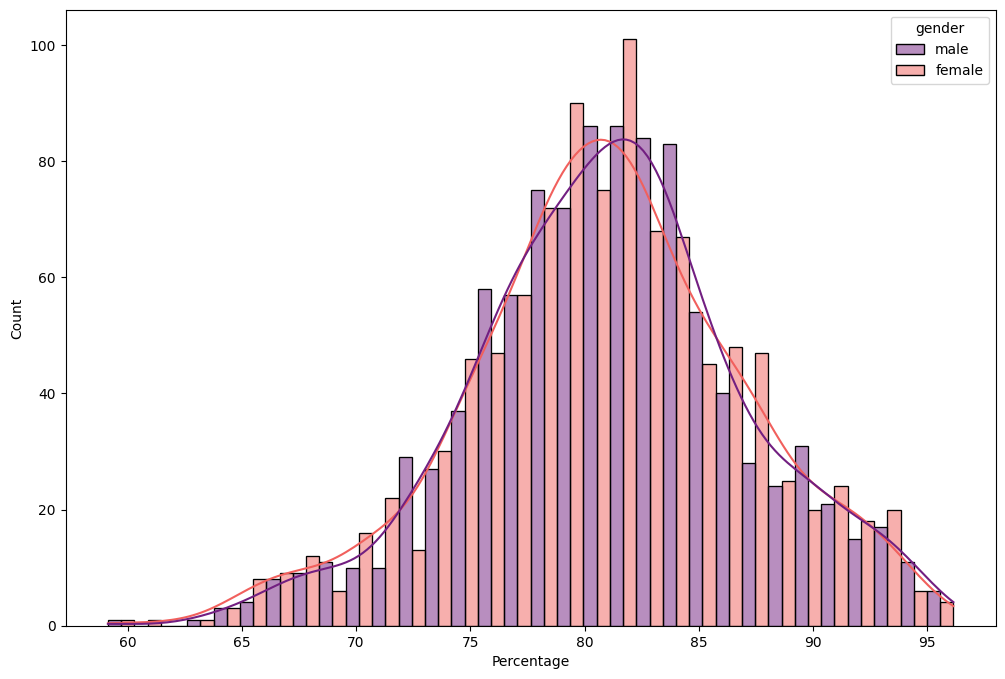

In [ ]:

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Percentage', hue='gender', multiple='dodge', kde=True, palette = 'magma')
plt.show()

<ipython-input-43-2e58f3f61c1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='Percentage', palette='magma')


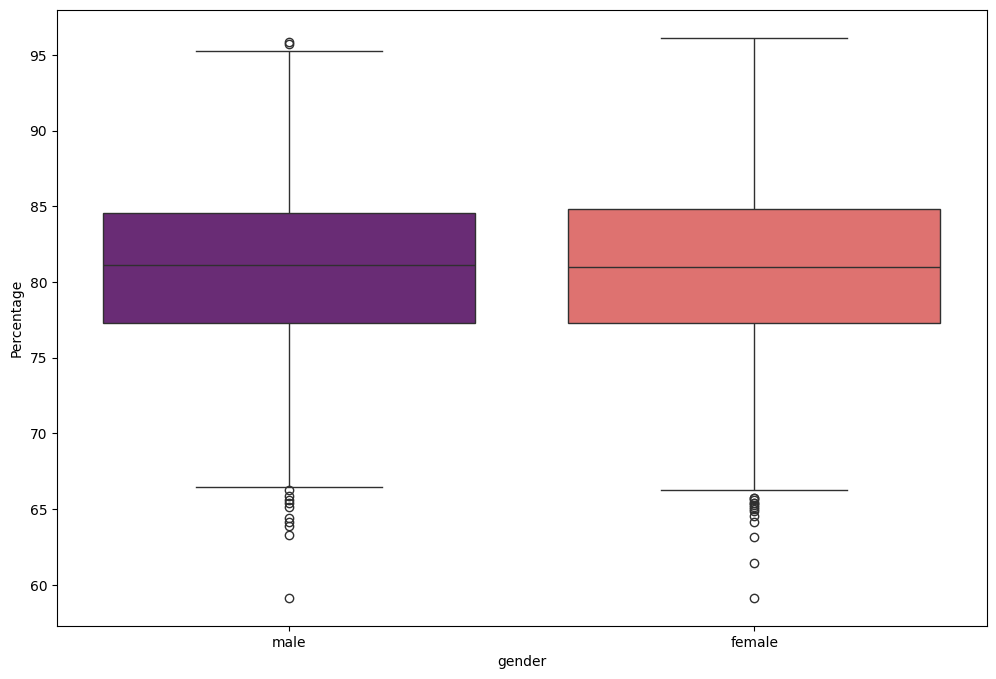

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='gender', y='Percentage', palette='magma')
plt.show()

##Data Cleaning

Original shape: (2000, 18)
Shape after removing outliers from 'Percentage': (1974, 18)


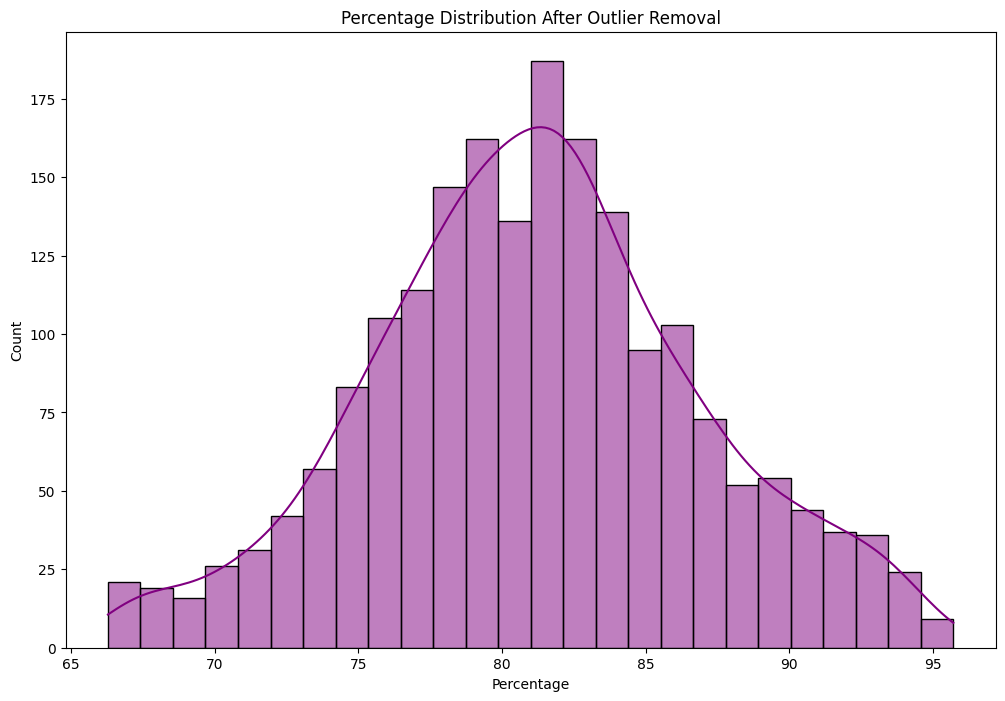

<ipython-input-86-5331ccfd76f1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='gender', y='Percentage', palette='magma')


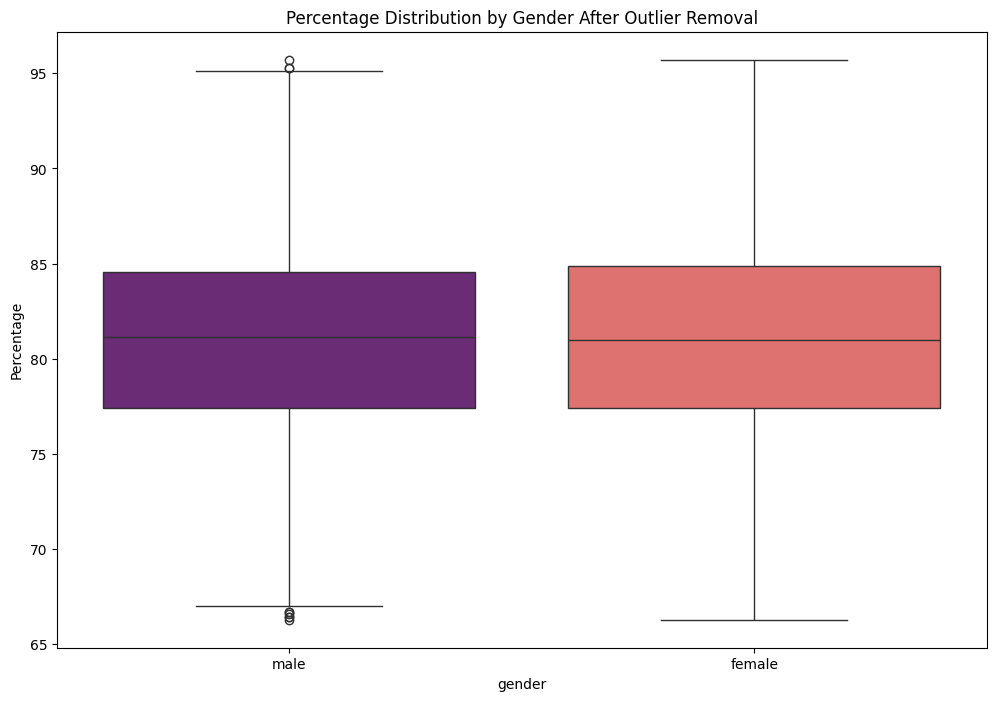

In [ ]:

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Example: Remove outliers from the 'Percentage' column
df_cleaned = remove_outliers_iqr(df, 'Percentage')

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers from 'Percentage': {df_cleaned.shape}")

# You can visualize the data after removing outliers
plt.figure(figsize=(12,8))
sns.histplot(df_cleaned['Percentage'], kde= True, color='purple')
plt.title('Percentage Distribution After Outlier Removal')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=df_cleaned, x='gender', y='Percentage', palette='magma')
plt.title('Percentage Distribution by Gender After Outlier Removal')
plt.show()

<ipython-input-87-decaf9760d99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.index, y=average_scores.values, palette='magma', order = average_scores.sort_values(ascending=False).index)


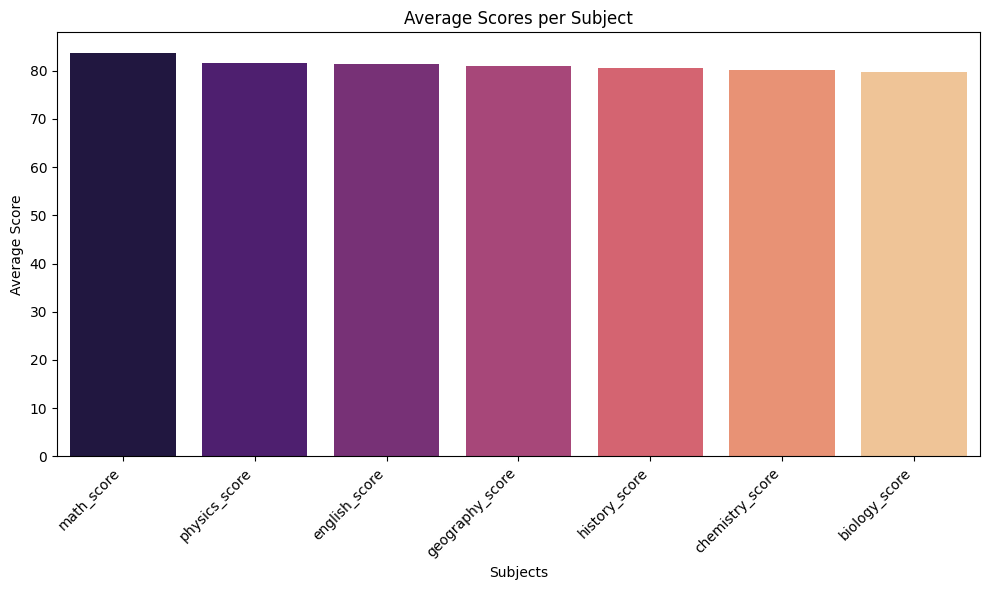

In [ ]:

subject_columns = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
average_scores = df_cleaned[subject_columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette='magma', order = average_scores.sort_values(ascending=False).index)
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.title('Average Scores per Subject')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.dtypes

,0
id,int64
email,object
gender,object
part_time_job,bool
absence_days,int64
extracurricular_activities,bool
weekly_self_study_hours,int64
career_aspiration,object
math_score,int64
history_score,int64


## Data Processing and Model Training

In [ ]:
X = df_cleaned.drop(['Total_score', 'Percentage', 'Full_name', 'id','email', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score'], axis=1)
y = df_cleaned['Percentage']

In [ ]:
for col in X.columns:
    if(X[col].dtype == 'object' or X[col].dtype == 'bool'):
        X[col] = X[col].astype('category')
        X[col] = X[col].cat.codes
X.head(5)

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration
0,1,0,3,0,27,9
1,0,0,2,0,47,6
2,0,0,9,1,13,8
3,0,0,5,0,3,1
4,1,0,5,0,10,15


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


## Model Evaluation

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_lin}")
print(f"R-squared: {r2_lin}")



Mean Squared Error: 24.59302145555579
R-squared: 0.30560816632592436


In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")

Mean Squared Error: 21.77822797043073
R-squared: 0.3850847614682539


In [ ]:
xgb_reg = xgb.XGBRegressor(learning_rate = 0.03, n_estimators = 120, max_depth = 4, max_leaves = 0)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

Mean Squared Error: 17.338303752257282
R-squared: 0.5104474431055241


<ipython-input-95-afc59aeaf238>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_series.values, y=feature_importance_series.index, palette='viridis')


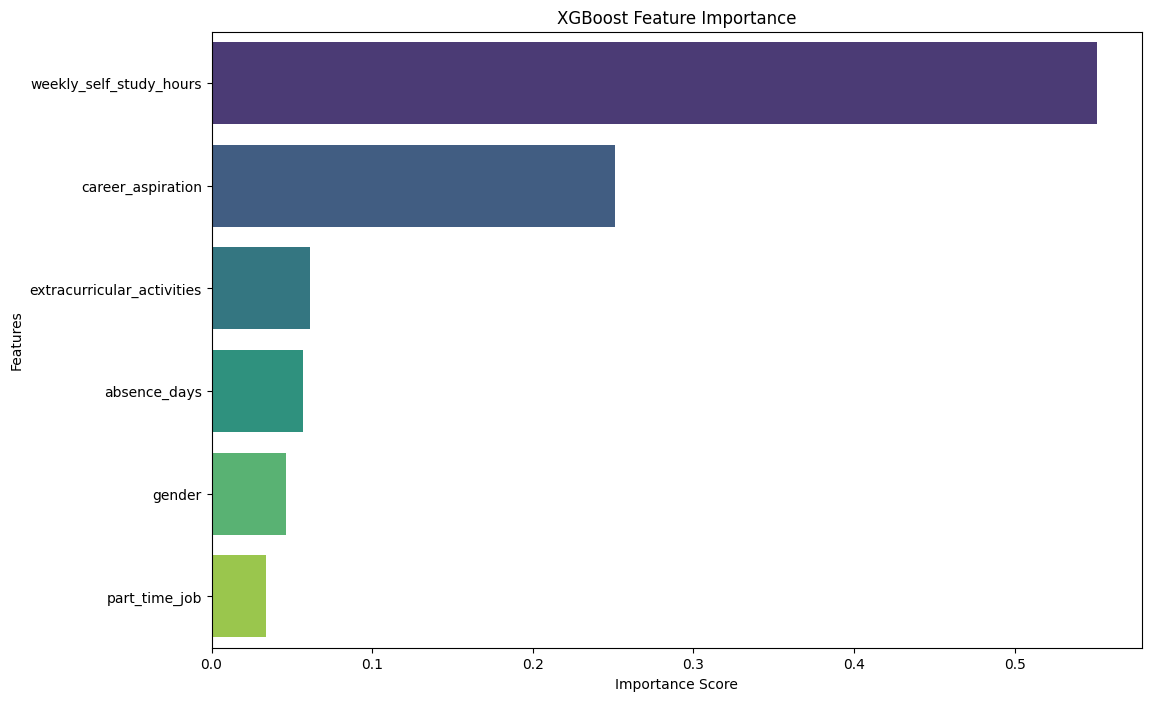

In [ ]:
# Get feature importance from the trained XGBoost model
feature_importances = xgb_reg.feature_importances_

# Create a pandas Series for easier plotting, mapping importance to original column names
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importance values
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_series.values, y=feature_importance_series.index, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()